In [5]:
# Import necessary modules
import torch
import torch.nn as nn
import torch.optim as optim

import sys
sys.path.append('/home/ckundu/projects/sta6367/python_temp/STA-6367-pytorch-project-example/src')  

# Import your modules
from networks.sample_net import SampleNet
from data.mnist_loader import MNISTLoader
from models.train_model import train_model
from models.predict_model import predict_model
from models.metrics import compute_accuracy

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

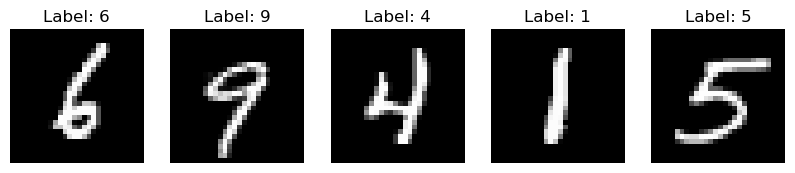

In [6]:
# Data loading
mnist_loader = MNISTLoader(batch_size=32, shuffle=True, device=device)

# Display some sample images
mnist_loader.show_samples()

In [4]:
# Model definition
model = SampleNet().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training
train_model(model, mnist_loader.get_train_loader(), mnist_loader.get_test_loader(), criterion, optimizer, num_epochs=1)

# Save the trained model (optional)
# torch.save(model.state_dict(), 'path/to/your/trained_model.pth')


Epoch 1/1:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing: 100%|██████████| 313/313 [00:02<00:00, 152.32it/s, Test Accuracy=0.841]

Epoch 1/1 | Training Loss: 1.7898 | Accuracy: 84.11%


In [3]:
# Inference
test_loader = mnist_loader.get_test_loader()
predictions = predict_model(model, test_loader)

# Ground truth labels (for testing purposes)
ground_truth = torch.cat([labels for _, labels in test_loader])

# Compute accuracy
accuracy = compute_accuracy(predictions, ground_truth)
print(f'Test Accuracy: {accuracy:.2%}')

NameError: name 'model' is not defined